Initial score with 10 estimators: 0.8182


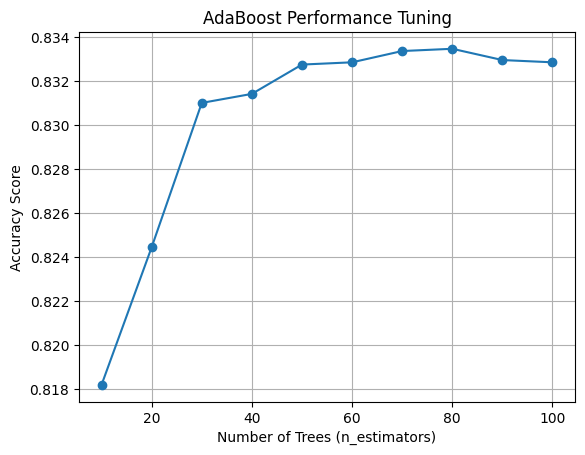

Best score: 0.8335 with 80 estimators


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("income.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initial AdaBoost model with 10 estimators
model = AdaBoostClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
initial_score = accuracy_score(y_test, model.predict(X_test))
print(f"Initial score with 10 estimators: {initial_score:.4f}")

# Fine-tune: Try different numbers of estimators
scores = []
estimators_range = range(10, 110, 10)
for n in estimators_range:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)

# Plot scores
plt.plot(estimators_range, scores, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy Score")
plt.title("AdaBoost Performance Tuning")
plt.grid(True)
plt.show()

# Report best
best_score = max(scores)
best_n = estimators_range[scores.index(best_score)]
print(f"Best score: {best_score:.4f} with {best_n} estimators")
